**PROJECT** **::** **FACTORS** **INFLUENCING** **HEART** **DISEASE**

---



**Case study** : Factors affecting heart disease using various model like:
 

*   Decision Tree
*   Random Forest

*   XGBoost Boosting
*   Logistic Regression(sklearn and Stats model)





**CONTEXT**:


*    Heart disease is easier to treat when it is detected in the early stages.
*    Machine learning techniques may aid a more efficient analysis in the prediction of the disease.


*   Moreover, this prediction is one of the most central problems in medicine, as it is one of the leading diseases related to an unhealthy lifestyle.
*   So, an early prediction of this disease will be useful for a cure or aversion.





**PROBLEM STATEMENT:**


*   Does various predicting factors really affect heart disease?
*   What are the variables actually affecting heart disease

*   what are the variables not affecting heart disease
*   Does heart disease depends on various variables/factors




**ATTRIBUTE**/**FEATURES** **INFORMATION**:
*   Age: Age of the patient
*   Gender: Gender of the patient -(Male==0, Female==1)

*   Chest_pain: It refers to the chest pain experienced by the patient
    (low-1,medium-2,high-3)
*   Rest_bps: Blood pressure of the patient while resting(in mm/Hg)


*   Cholesterol: Patient's cholesterol level (in mg/dl)
*   Fasting_blood_sugar: The blood sugar of the patient while fasting


*   Rest_ecg: It refers to potassium level in patient-(low-1,medium-2,high-3)
*   Thalach: Pstient's maximum heart rate


*   Exer_angima: It refers to exercise-induced angima-(yes-1,no-0)

*   Old_peak: It is the depression induced by exercise relative to rest
*   Slope: It refers to the slope of the peak of the exercise ST-Segment                                 (low-1,   medium-2,high-3)


*   ca: Number of major vessels/calium level (0,1,2,3,4)
*   Thalassemia: It refers to thalassemia which is a blood disorder - (0,1,2,3)
     numbers indicate level of disoreder


*   Target: The patient has heart disease or not - (1=Yes, 0=No)

**Steps involved in model Building:**
 

*   Understanding the problem statement
*   Overview of the data


*   Data preparation / cleaning
*   Model biulding / choose model,trian and evaluate


*   Conclusion based on model

**Import Libraries:**

In [ ]:
#importing the drive for required file
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/My Drive/Colab Notebooks/PROJECT/PROJECT'

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/PROJECT/PROJECT


In [ ]:
#importing the required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier

**Read and Explore the Data:**

In [ ]:
#reading the original data using csv file
data = pd.read_csv("HeartDisease.csv")
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#making the shallow copy of the data for EDA and data analysis 
#shalllow copy is made bcz  if any changes done that should not change in original data
df = data.copy()
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Overview of data:**

In [ ]:
#checking the data of first five rows using head option
#By default head shows only five rows but u can get any numbers of rows using df.head(number)
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#checking the data of last five rows using tail option
#By default tail shows only five rows but u can get any numbers of rows using df.tail(number)
df.tail()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#getting all the information of dataset using info command 
#info command gives
  #1 No of rows 
  #2 No of columns 
  #3 No of float,int,object columns 
  #4 Datatype of all the columns
  #5 Data used for storing 
  #6 Notnull values of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Filtering the missing values 
#checking the null values in dataset using df.isnull() command 
#to_list  creates the list of the output of null values with the sum of nullvalues of every column
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

**Observations:**


*   There are 303rows and 14columns
*   All the variables/columns are label encoded , so only numeric columns are seen
*   Data cleaning is not required as there is no any null values
*   Dependent variable is Target

In [ ]:
# checking the columns names 
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [ ]:
#checking the shape of data
df.shape

(303, 14)

In [ ]:
#include all includes all datatype columns in dataset like object or float or int columns
#describe is used for getting every info of columns like
 #If the column datatype is object it shows all the unique values,topmost value,frequency of column
 #If the column datatype is number(float,int) it shows mean,median,standard deviation,quantile of every column
df.describe(include="all")

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking the datatype of all columns
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [ ]:
#selecting only numeric columns 
numeric_cols=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['age',
 'gender',
 'chest_pain',
 'rest_bps',
 'cholestrol',
 'fasting_blood_sugar',
 'rest_ecg',
 'thalach',
 'exer_angina',
 'old_peak',
 'slope',
 'ca',
 'thalassemia',
 'target']

In [ ]:
#selecting only object columns
object_cols=df.select_dtypes(include=['object']).columns.tolist()
object_cols

[]

**Checking unique values of every column/variables:**

In [ ]:
df["age"].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [ ]:
df["gender"].unique()

array([1, 0])

In [ ]:
df["chest_pain"].unique()

array([3, 2, 1, 0])

In [ ]:
df["rest_bps"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [ ]:
df["cholestrol"].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [ ]:
df["fasting_blood_sugar"].unique()

array([1, 0])

In [ ]:
df["rest_ecg"].unique()

array([0, 1, 2])

In [ ]:
df["thalach"].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

In [ ]:
df["exer_angina"].unique()

array([0, 1])

In [ ]:
df["old_peak"].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [ ]:
df["slope"].unique()

array([0, 2, 1])

In [ ]:
df["thalassemia"].unique()

array([1, 2, 3, 0])

In [ ]:
df["ca"].unique()

array([0, 2, 1, 3, 4])

In [ ]:
df["target"].unique()

array([1, 0])

In [ ]:
#let us write a function that will help us create boxplot and histogram for any input numerical variable
#this function takes numerical column as input and return boxplots and histogram for the variable

def histogram_boxplot(feature,figsize=(15,10),bins=None):
  """ Boxplot and histogram combined 
  feature :1-d feature array
  figsize:size of fig (default(9,8))
  bins: number of bins (default None/auto)
  """
  sns.set(font_scale=2) #setting the font scale of the seaborn
  f2,(ax_box2,ax_hist2)=plt.subplots(nrows=2, #number of rows of the subplot grid=2
                                     sharex=True, #x axis will be shared among all subplots
                                     gridspec_kw={"height_ratios":(0.25,0.75)},
                                     figsize=figsize
                                     ) #creating the 2 subplots
  sns.boxplot(feature,ax=ax_box2,showmeans=True,color="red") #box plot will be created and a star
  sns.distplot(feature,kde=False,ax=ax_hist2,bins=bins) if bins else sns.distplot(feature,kde=False,ax=ax_hist2)

  ax_hist2.axvline(np.mean(feature),color="g",linestyle="--") #add mean to the histogram
  ax_hist2.axvline(np.median(feature),color="black",linestyle="-") #add median to the histogram

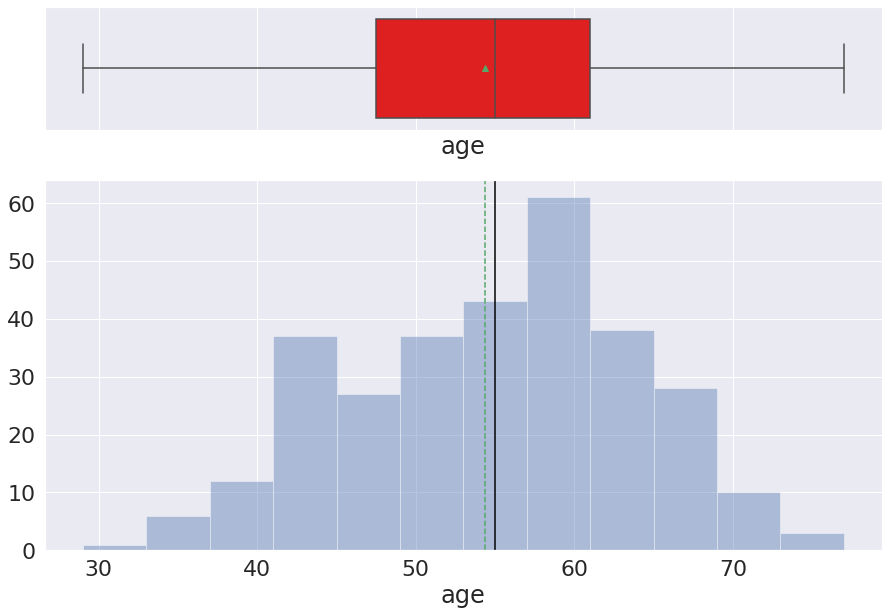

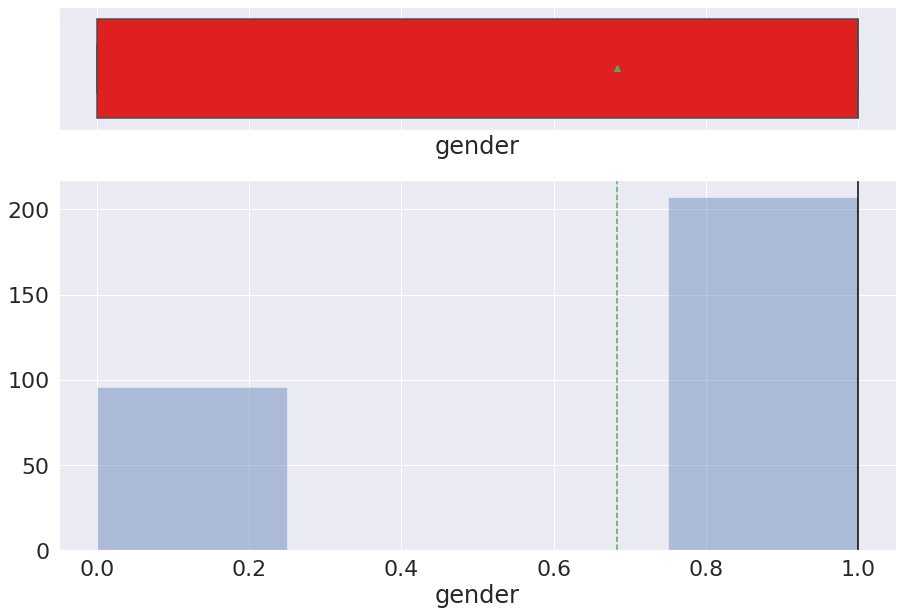

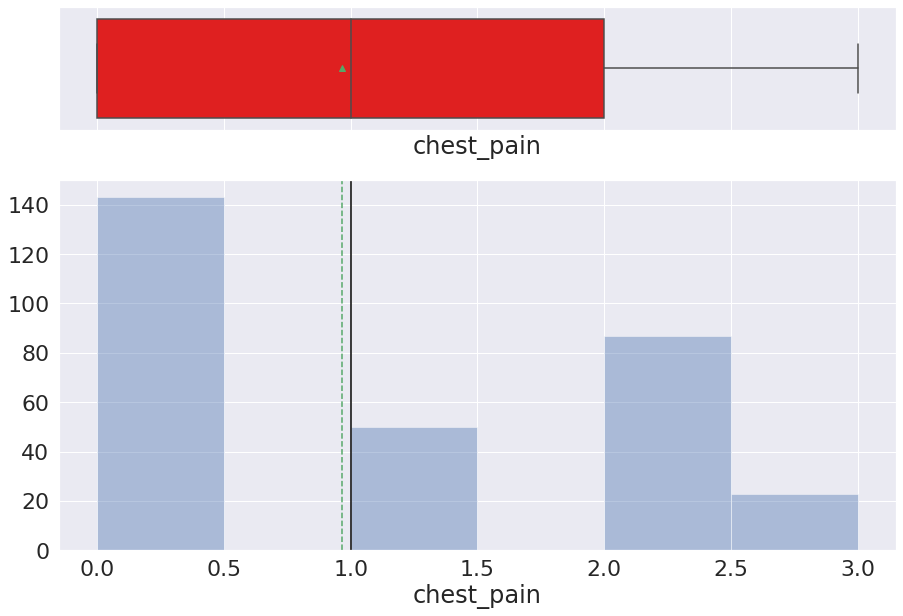

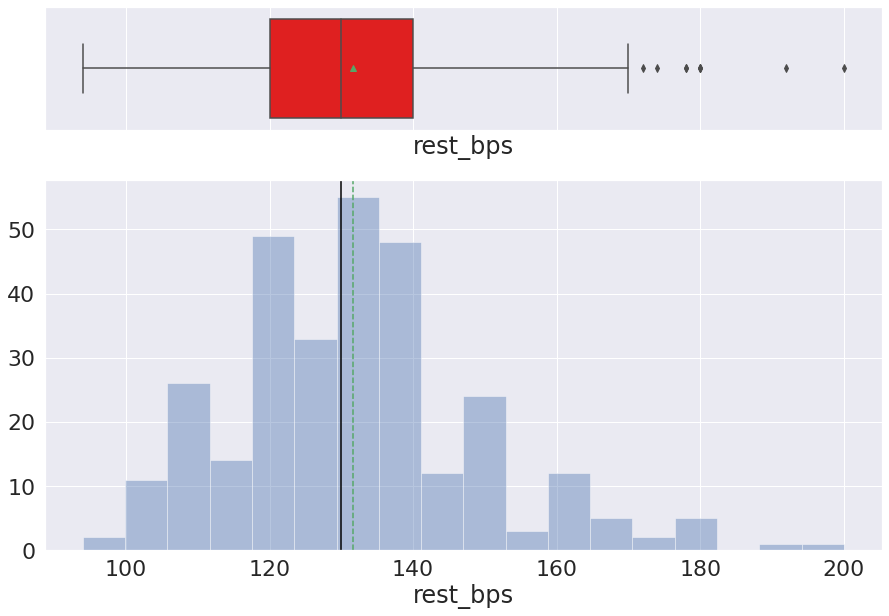

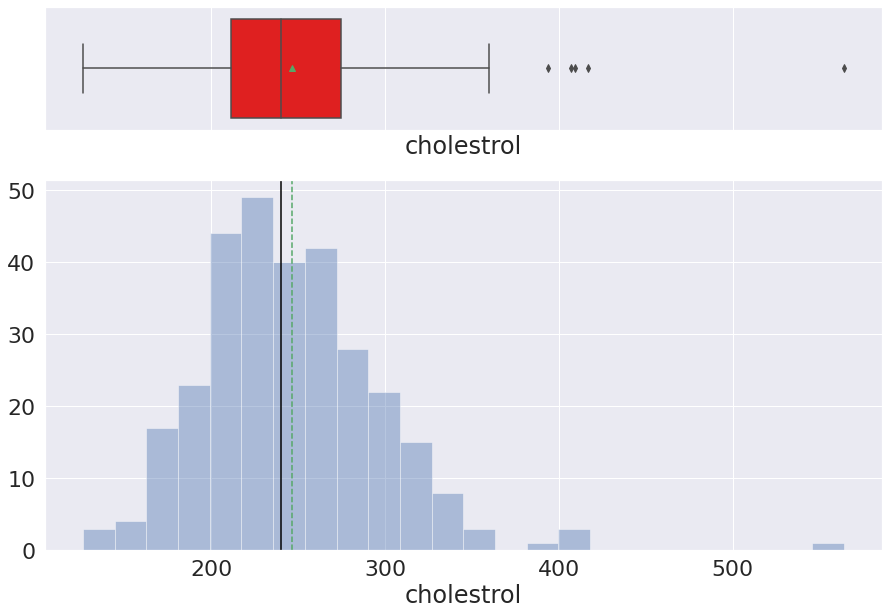

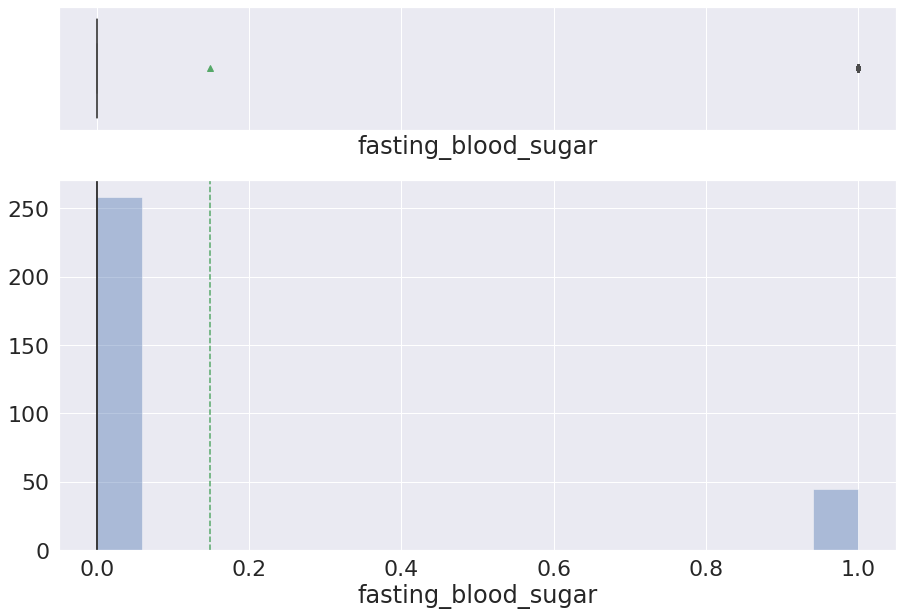

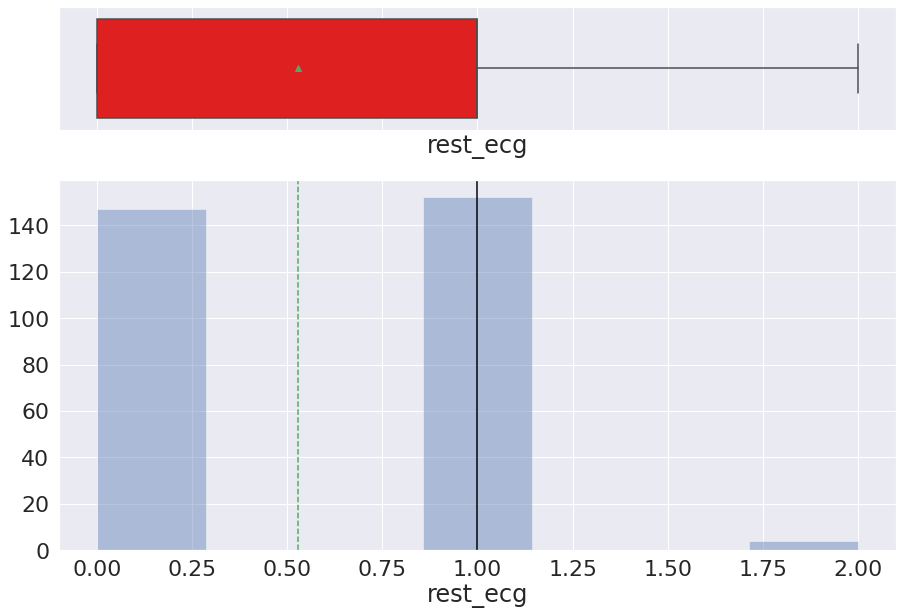

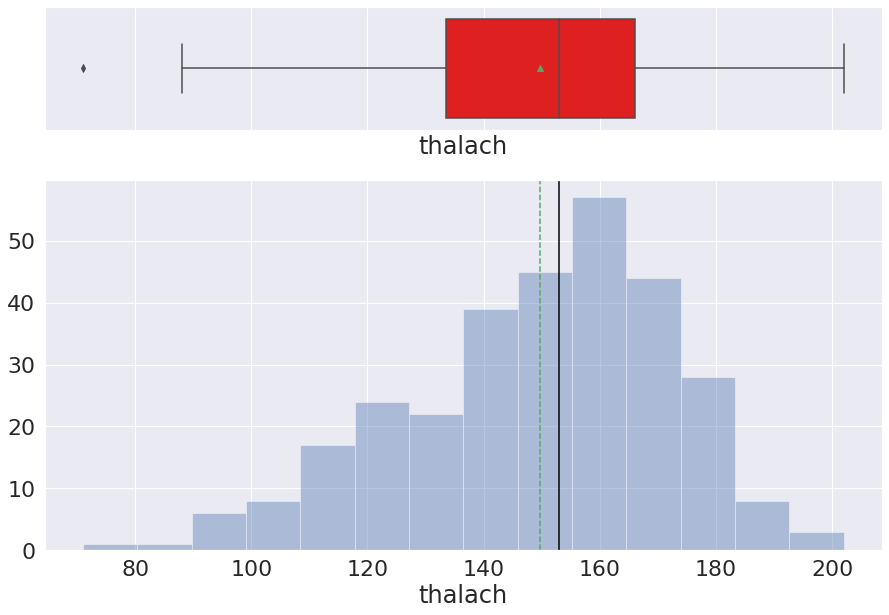

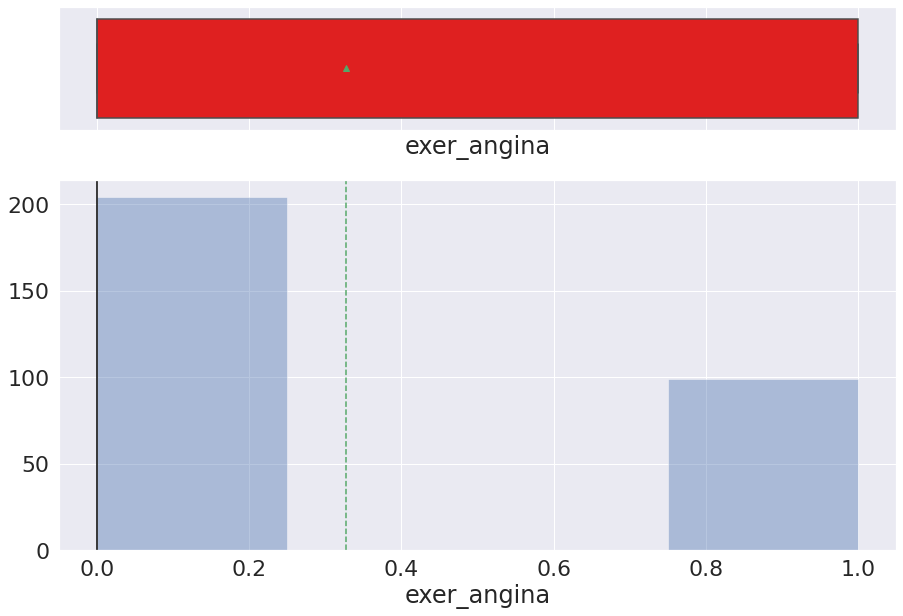

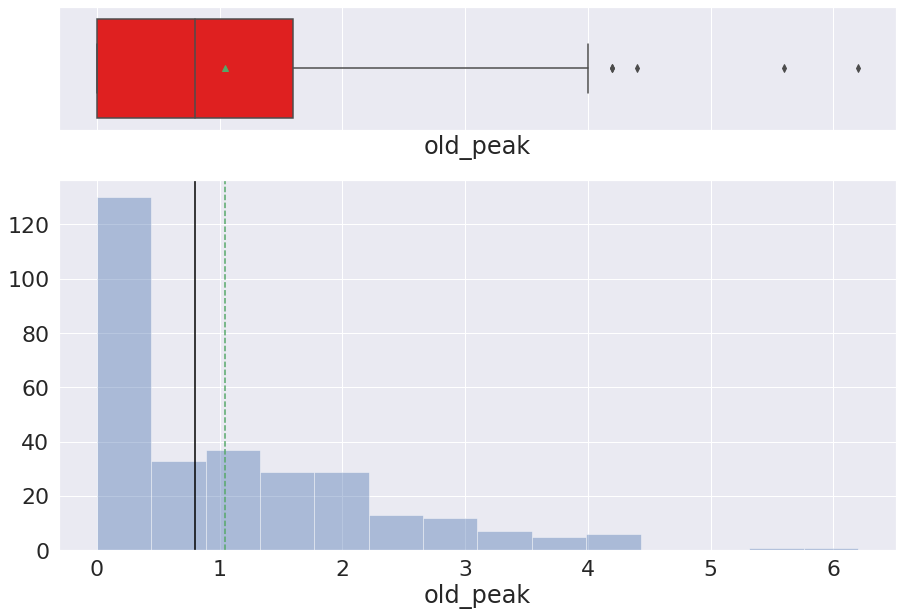

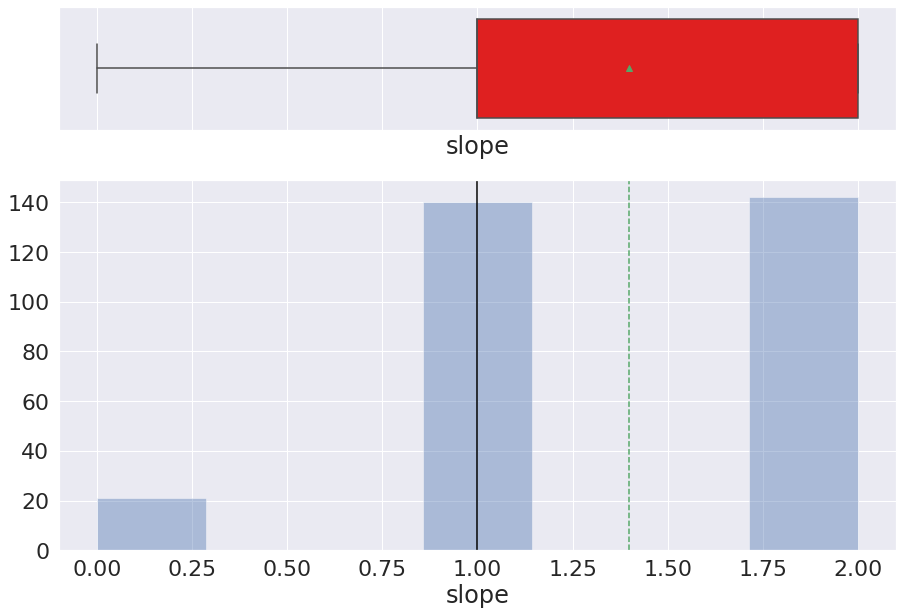

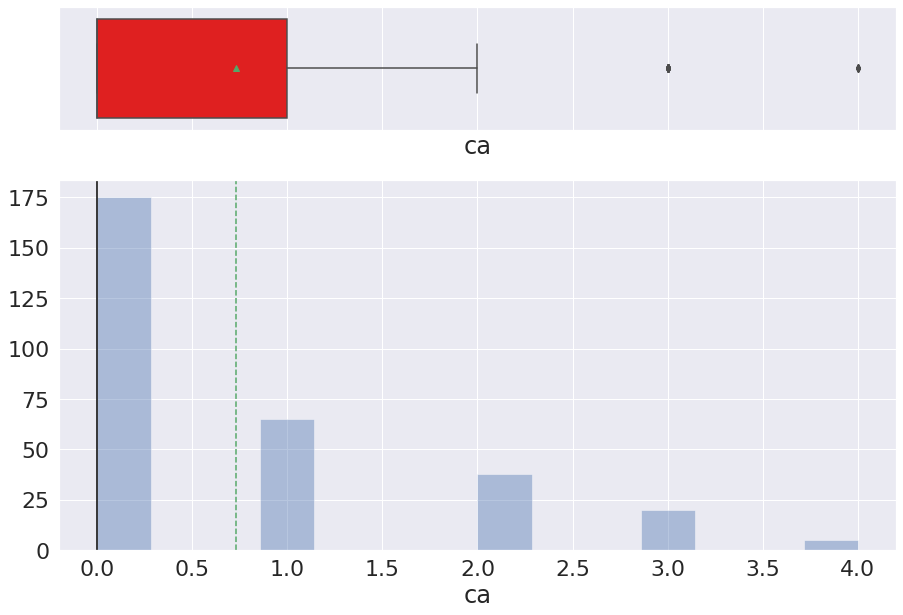

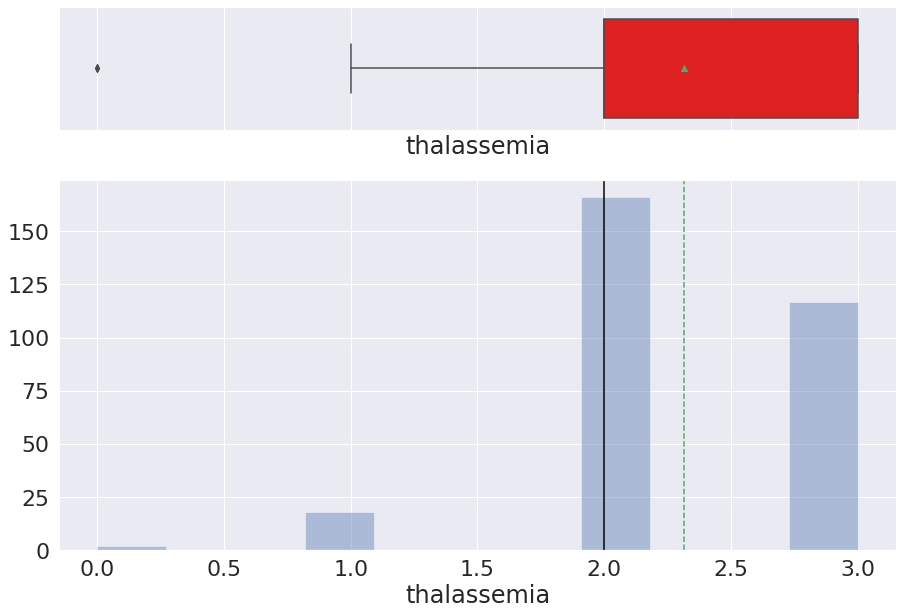

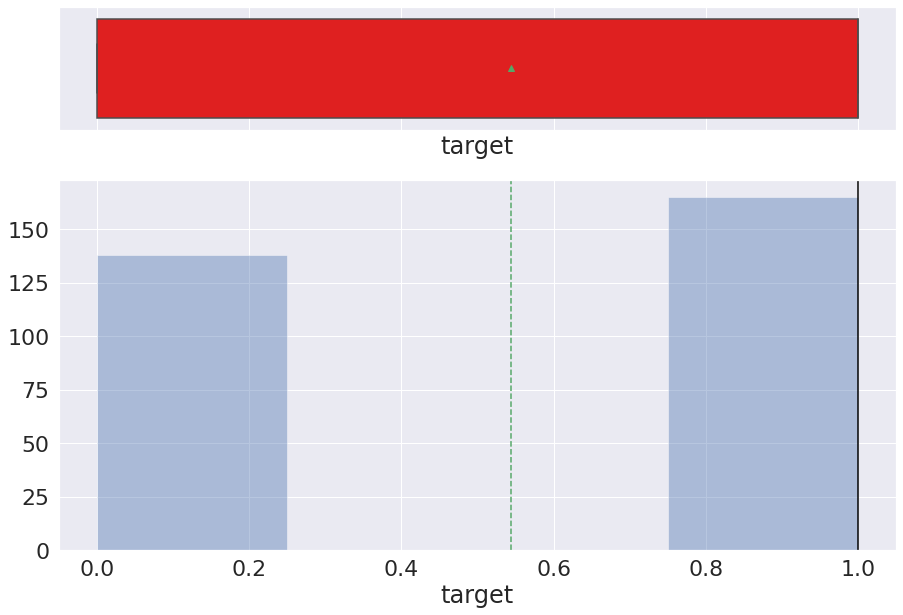

In [ ]:
#checking histogram boxplot of numeric columns 
for feature in numeric_cols:
  histogram_boxplot(df[feature])

In [ ]:
#drawing all barplots for categorical columns

for features in object_cols:
  df[features].value_counts().plot.bar()
  plt.xlabel(features)
  plt.ylabel("count")
  plt.show()

In [ ]:
#Removing target variable bcz outliers treatment is not done on dependent variable
numeric_cols.remove('target')

In [ ]:
#removing exer_angima,fasting_blood_sugar columns as they are not contributing in the prediction
numeric_cols.remove('exer_angina')
numeric_cols.remove('fasting_blood_sugar')

In [ ]:
#checking...
numeric_cols

['age',
 'gender',
 'chest_pain',
 'rest_bps',
 'cholestrol',
 'rest_ecg',
 'thalach',
 'old_peak',
 'slope',
 'ca',
 'thalassemia']

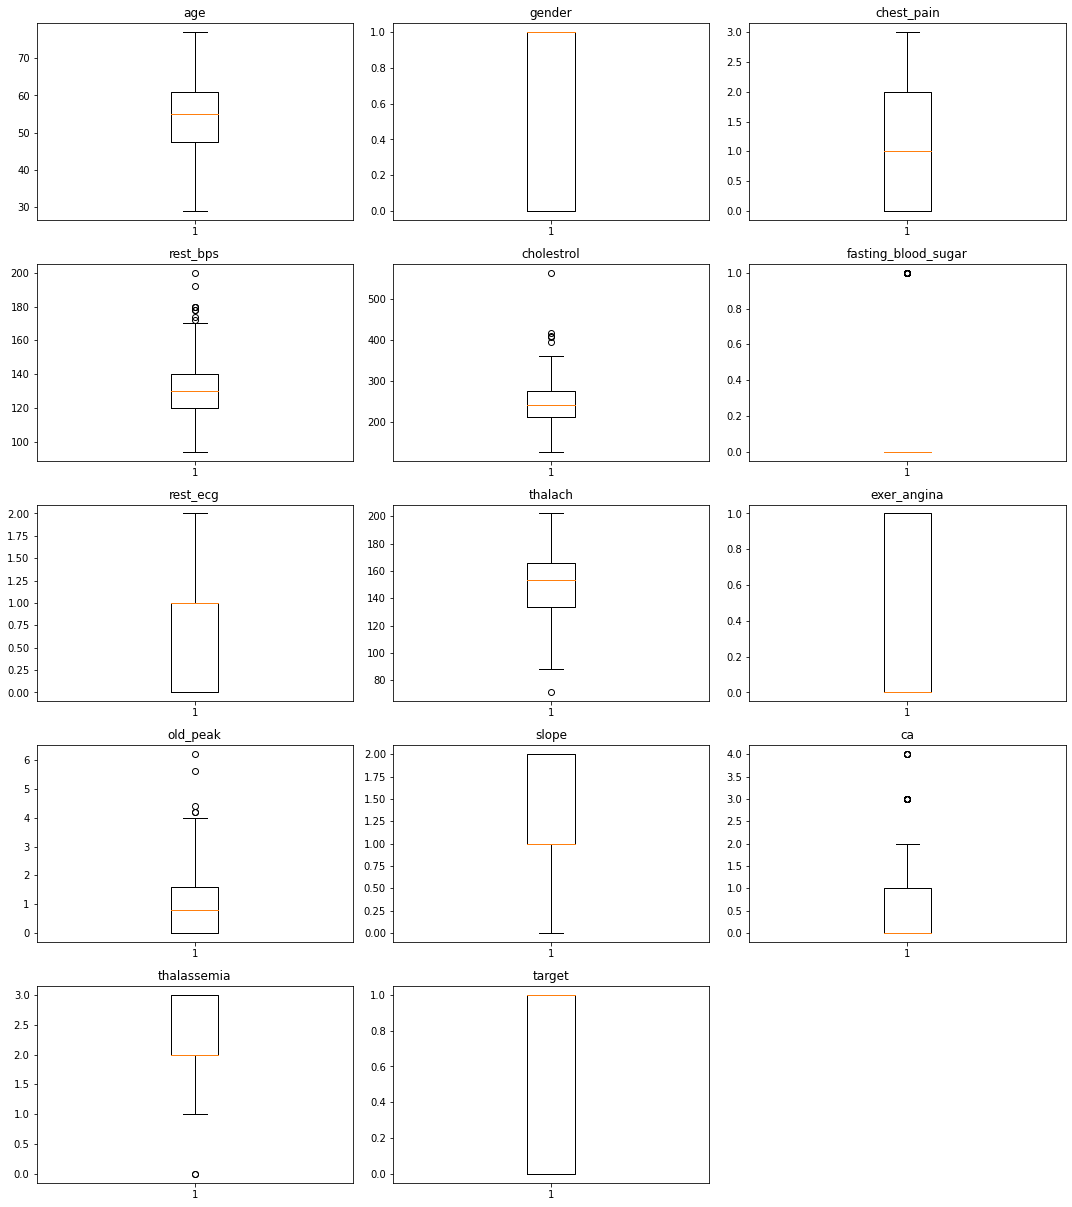

In [ ]:
#Outliers Detections 
#checking the outliers using boxplot 
#let us write a function that will help us boxplot for any input numerical variable
#It takes numerical columns as input and plots the boxplot of particular column with outliers
plt.figure(figsize=(15,30))
for i , variable in enumerate(numeric_cols):
                      plt.subplot(9,3,i+1)
                      plt.boxplot(df[variable],whis=1.5)
                      plt.tight_layout()
                      plt.title(variable)
plt.show()

In [ ]:
#outliers treatment 
#clipping method is used for outliers treatment 
#In the given code below first it gets q1,q3 and IQR of every column and clipping process is done for outliers treatment
#for outliers treatment we can use np.clip and np.where for cliiping purpose 
for feature in numeric_cols :
  Q1=df[feature].quantile(0.25)
  Q3=df[feature].quantile(0.75)
  IQR=Q3-Q1
  Upper_whisker=Q3+1.5*IQR
  Lower_whisker=Q1-1.5*IQR
  df[feature] = np.where(df[feature] <Lower_whisker,Lower_whisker ,df[feature])
  df[feature] = np.where(df[feature] >Upper_whisker, Upper_whisker,df[feature])

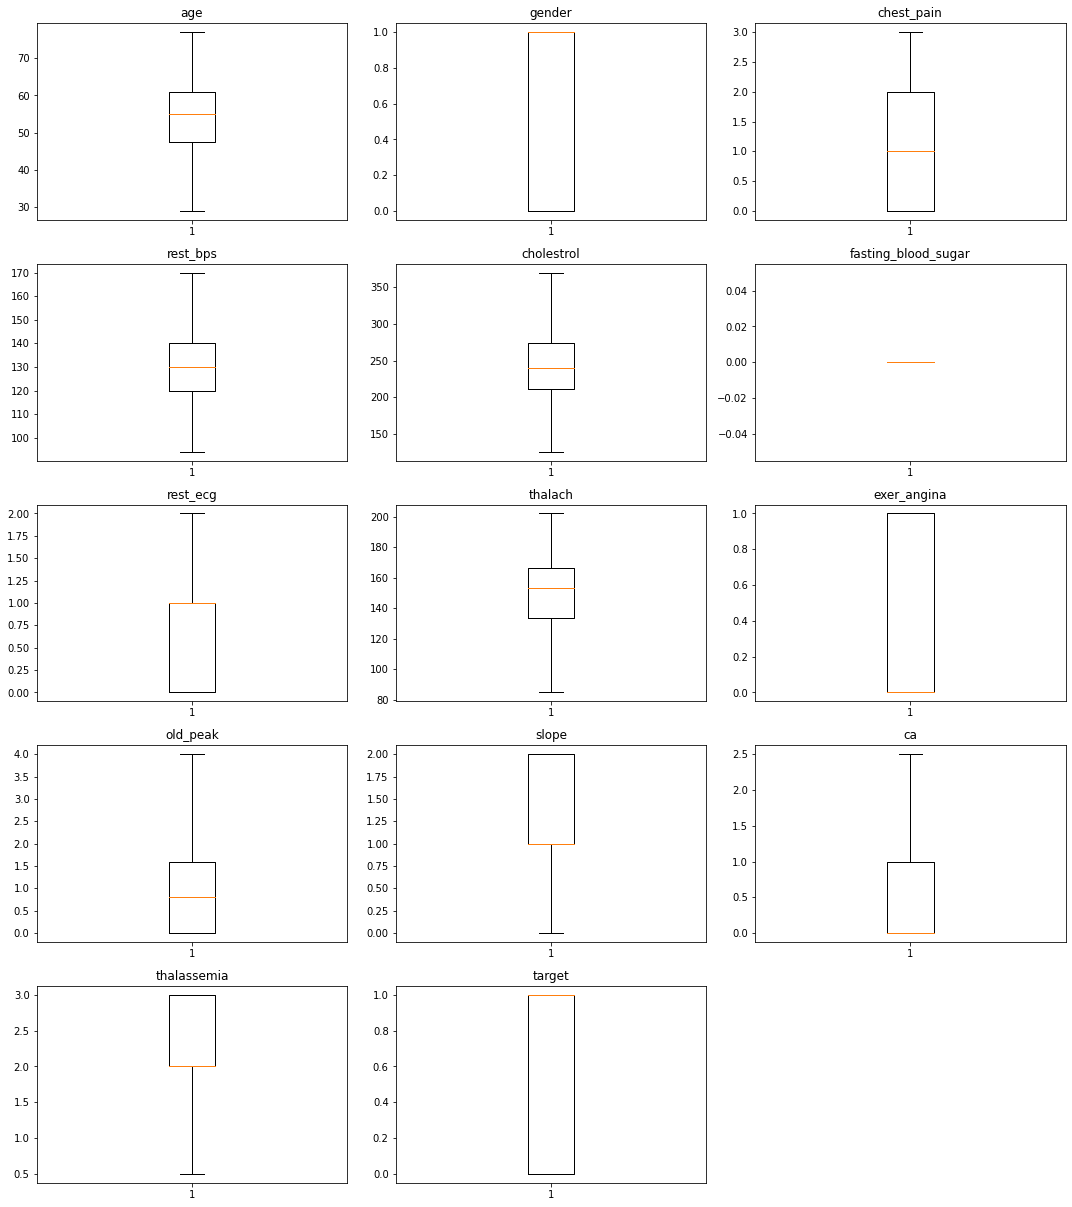

In [ ]:
#Outliers Detections 
#checking the outliers using boxplot 
#let us write a function that will help us boxplot for any input numerical variable
#It takes numerical columns as input and plots the boxplot of particular column with outliers
plt.figure(figsize=(15,30))
for i , variable in enumerate(numeric_cols):
                      plt.subplot(9,3,i+1)
                      plt.boxplot(df[variable],whis=1.5)
                      plt.tight_layout()
                      plt.title(variable)
plt.show()

In [ ]:
#split the dependent and independent variable 
x = df.drop(['target','fasting_blood_sugar','exer_angina'], axis=1)
y = df[['target']]


print(x.head())
print(y.head())

    age  gender  chest_pain  rest_bps  cholestrol  rest_ecg  thalach  \
0  63.0     1.0         3.0     145.0       233.0       0.0    150.0   
1  37.0     1.0         2.0     130.0       250.0       1.0    187.0   
2  41.0     0.0         1.0     130.0       204.0       0.0    172.0   
3  56.0     1.0         1.0     120.0       236.0       1.0    178.0   
4  57.0     0.0         0.0     120.0       354.0       1.0    163.0   

   old_peak  slope   ca  thalassemia  
0       2.3    0.0  0.0          1.0  
1       3.5    0.0  0.0          2.0  
2       1.4    2.0  0.0          2.0  
3       0.8    2.0  0.0          2.0  
4       0.6    2.0  0.0          2.0  
   target
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0


In [ ]:
y.nunique()

target    2
dtype: int64

**MODEL BUILDING WITH DECISION TREE ALGORITHM:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#import required libraries
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 7)

In [ ]:
y_train.value_counts()/len(y_train)

target
1         0.561321
0         0.438679
dtype: float64

In [ ]:
model=DecisionTreeClassifier(criterion='gini',random_state=10)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
#predict the test set
pred_test = model.predict(x_test)

In [ ]:
#predict trian set
pred_train=model.predict(x_train)

In [ ]:
model.feature_importances_.sum()

1.0

In [ ]:
model.feature_importances_

array([0.12558618, 0.05036756, 0.29632726, 0.05826467, 0.0572581 ,
       0.01676154, 0.09248566, 0.13473675, 0.00810448, 0.1007089 ,
       0.0593989 ])

In [ ]:
x_train.shape

(212, 11)

In [ ]:
#import confusion matrix code 
#cnfusion matrix creates crosstab of TN,TP,FP,FN
from sklearn.metrics import confusion_matrix

In [ ]:
# defining a confusion matrix

def make_confusion_matrix(y_actual,y_predict,labels=[1,0]):
  '''
  y_predict : prediction of class
  y_actual : ground truth 
  '''
  cm =confusion_matrix(y_actual,y_predict,labels=[1,0])
  df_cm = pd.DataFrame(cm,index=[i for i in ["Provide Disc","No Disc"]],
                       columns=[i for i in ["Provide Disc","No Disc"]])
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1,v2 in
            zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm,annot=labels,fmt='')
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

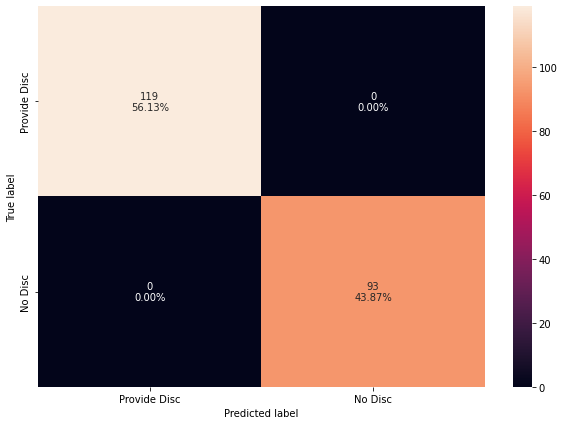

In [ ]:
#calling the confusion matrix for train data 
make_confusion_matrix(y_train,pred_train)

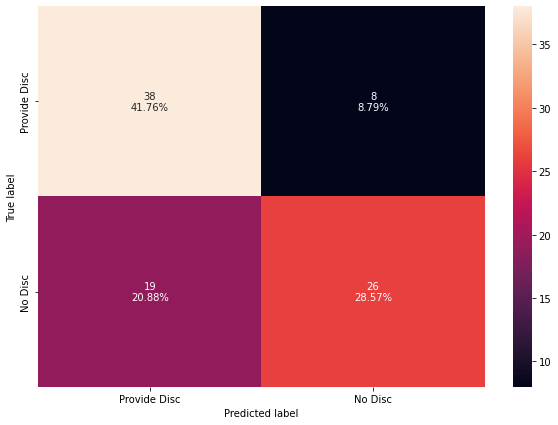

In [ ]:
#calling the confusion matrix for test data 
make_confusion_matrix(y_test,pred_test)

In [ ]:
#import required finding values
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train))
print("Recall on test data:",recall_score(y_test,pred_test))
print("\n")

Recall on train data: 1.0
Recall on test data: 0.8260869565217391




In [ ]:
print("Precision on train data:",precision_score(y_train,pred_train))
print("Precision on test data:",precision_score(y_test,pred_test))
print("\n")

Precision on train data: 1.0
Precision on test data: 0.6666666666666666




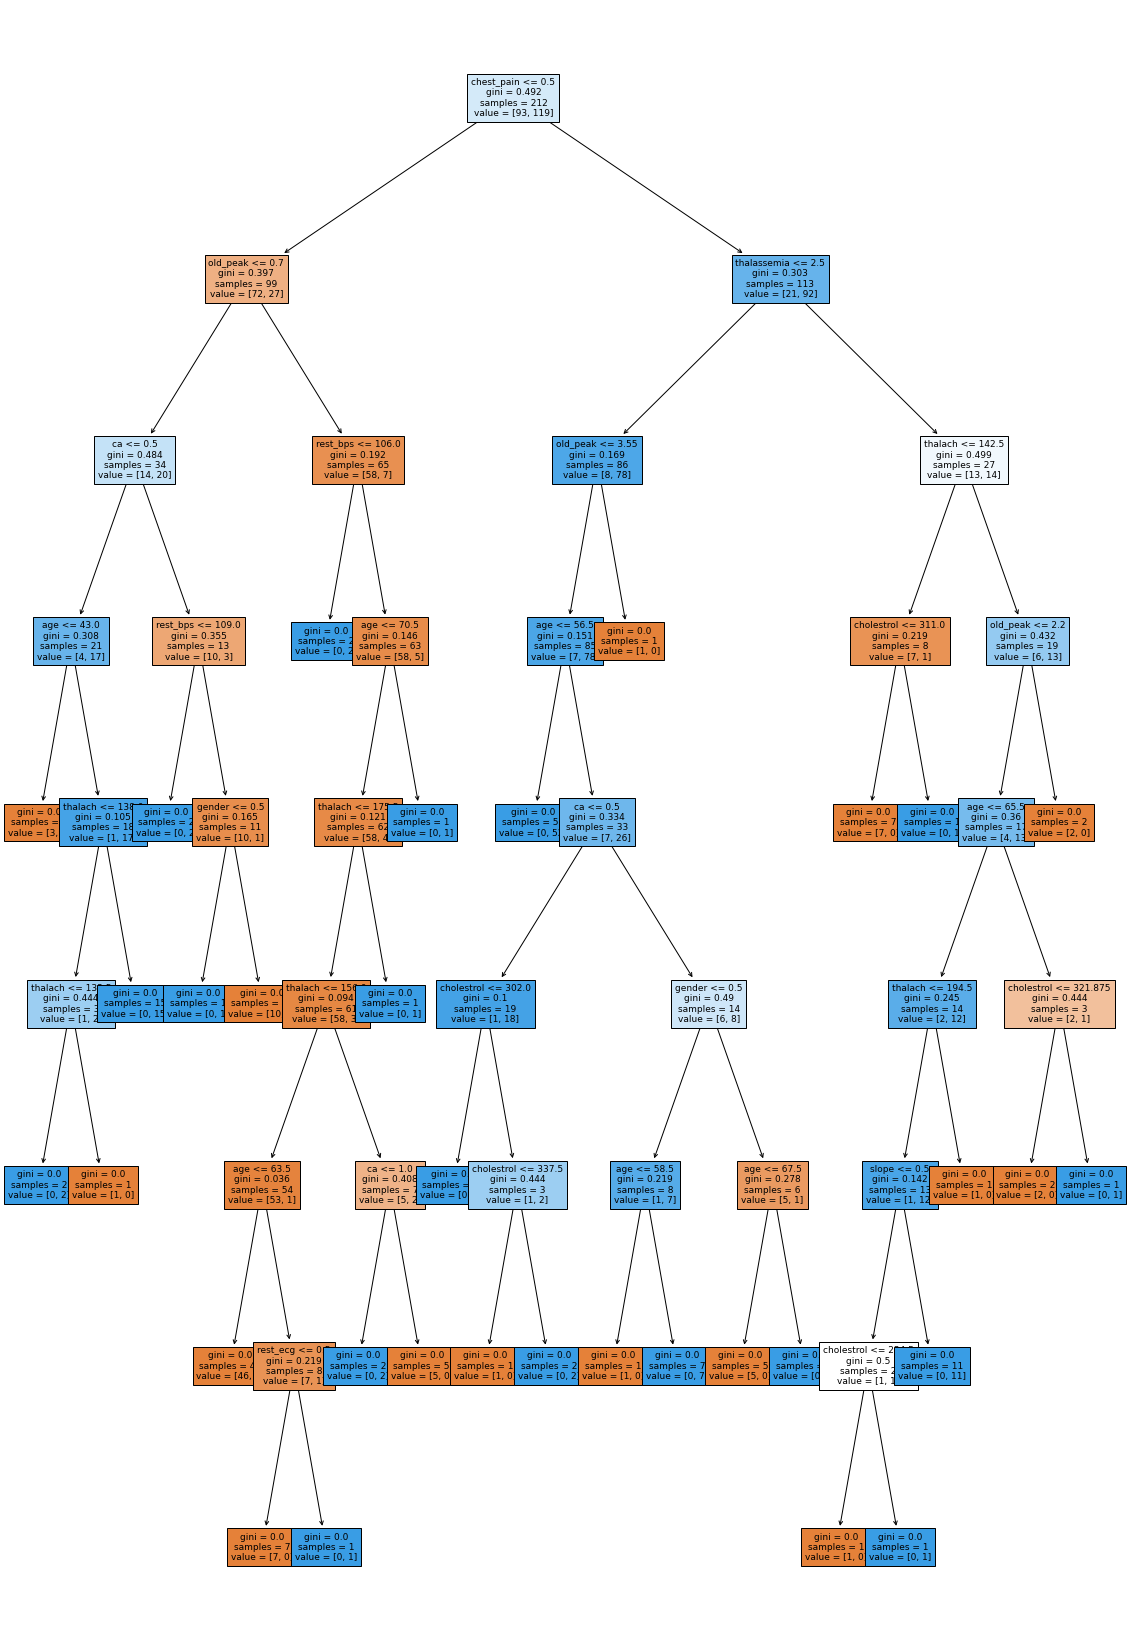

In [ ]:
from sklearn import tree
feature_names=list(x.columns)
plt.figure(figsize=(20,30))
out =tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)

for o in out:
  arrow =o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- chest_pain <= 0.50
|   |--- old_peak <= 0.70
|   |   |--- ca <= 0.50
|   |   |   |--- age <= 43.00
|   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |--- age >  43.00
|   |   |   |   |--- thalach <= 138.00
|   |   |   |   |   |--- thalach <= 133.50
|   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |--- thalach >  133.50
|   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- thalach >  138.00
|   |   |   |   |   |--- weights: [0.00, 15.00] class: 1
|   |   |--- ca >  0.50
|   |   |   |--- rest_bps <= 109.00
|   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |--- rest_bps >  109.00
|   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- gender >  0.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |--- old_peak >  0.70
|   |   |--- rest_bps <= 106.00
|   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |--- rest_bps >  106.00
| 

In [ ]:
#importance of features
print(pd.DataFrame(model.feature_importances_,columns=["Imp"],index=x_train.columns).sort_values(by = "Imp",ascending=False))

                  Imp
chest_pain   0.296327
old_peak     0.134737
age          0.125586
ca           0.100709
thalach      0.092486
thalassemia  0.059399
rest_bps     0.058265
cholestrol   0.057258
gender       0.050368
rest_ecg     0.016762
slope        0.008104


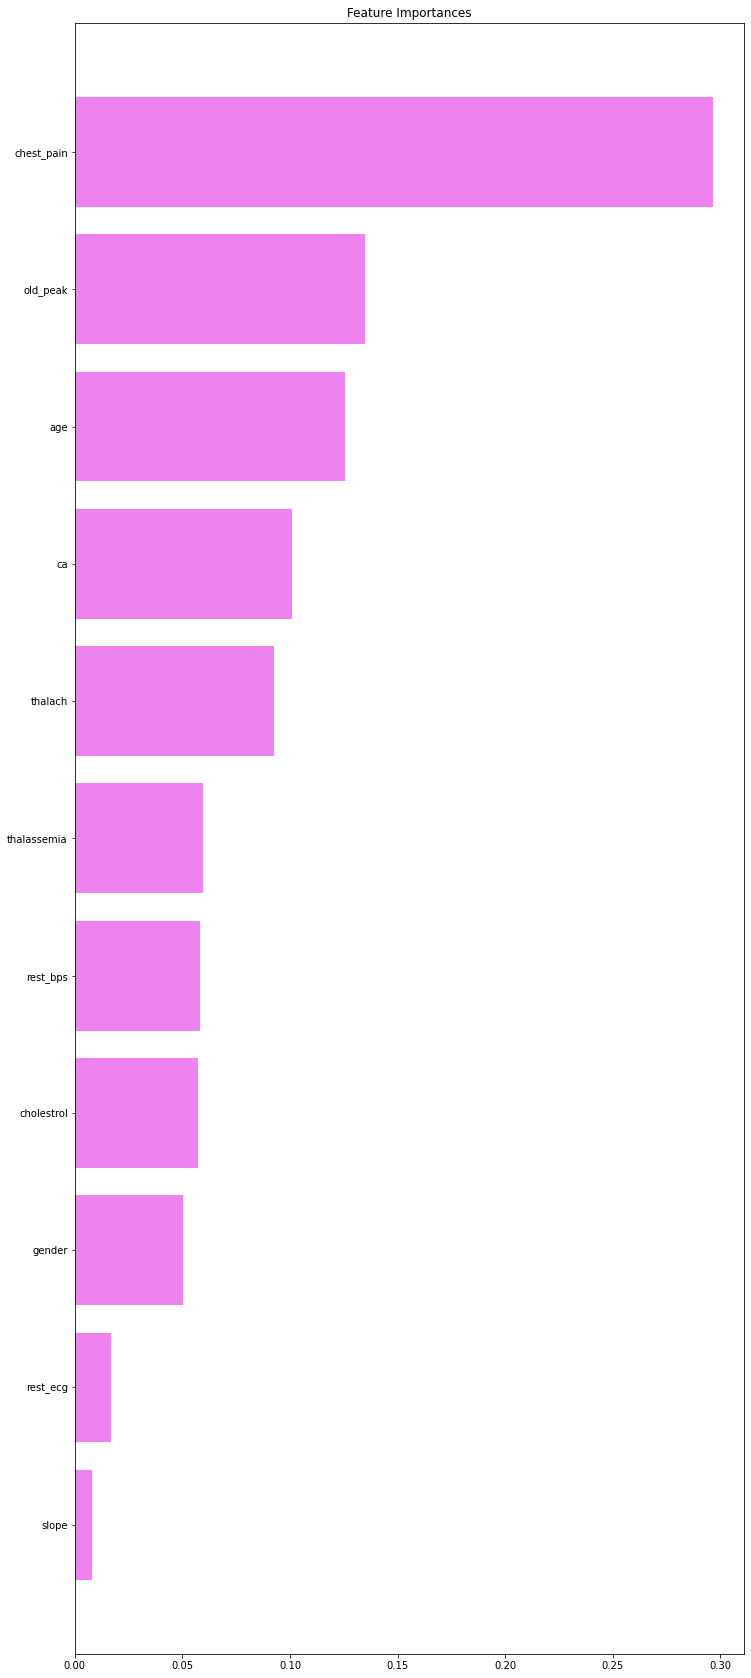

In [ ]:
importances=model.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(12,30))
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices],color="violet",align="center")
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import metrics
estimator = DecisionTreeClassifier(random_state=1)
parameters={
          'max_depth':np.arange(4,10),
           'criterion':['gini'],
           'splitter':['best'],
           'min_impurity_decrease':[0.00001,0.0001],
           'max_features':['log2'],
            'min_samples_split':[60],
            #'random_state':[1]
          }

scorer =metrics.make_scorer(metrics.recall_score)

grid_obj =GridSearchCV(estimator,parameters,scoring=scorer,cv=5)
grid_obj=grid_obj.fit(x_train,y_train)

estimator =grid_obj.best_estimator_

estimator.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2',
                       min_impurity_decrease=1e-05, min_samples_split=60,
                       random_state=1)

In [ ]:
estimator =grid_obj.best_params_
estimator

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_impurity_decrease': 1e-05,
 'min_samples_split': 60,
 'splitter': 'best'}

In [ ]:
pred_train_estimator=estimator.predict(x_train)

In [ ]:
pred_test_estimator=estimator.predict(x_test)

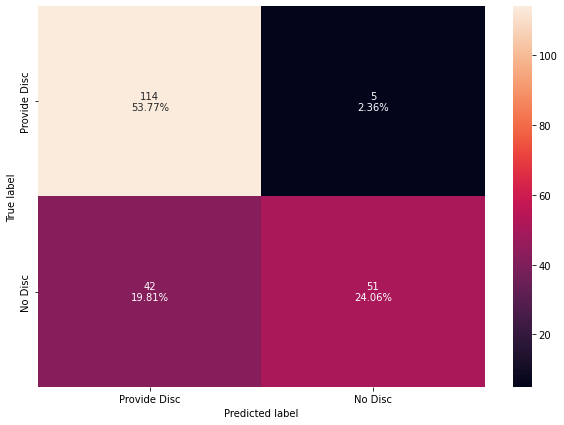

In [ ]:
#calling the confusion matrix for train data 
make_confusion_matrix(y_train,pred_train_estimator)

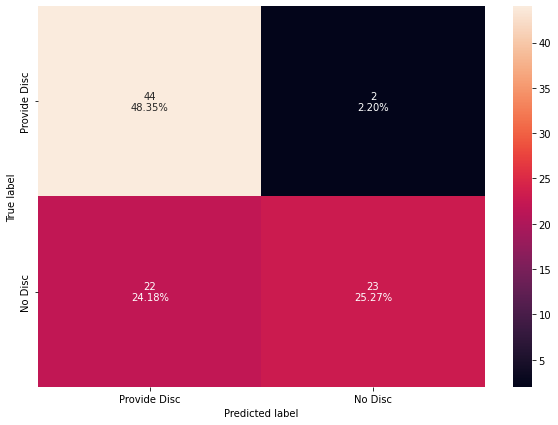

In [ ]:
#calling the confusion matrix for train data 
make_confusion_matrix(y_test,pred_test_estimator)

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train_estimator))
print("Recall on test data:",recall_score(y_test,pred_test_estimator))
print("\n")

Recall on train data: 0.957983193277311
Recall on test data: 0.9565217391304348




In [ ]:
print("Precision on train data:",precision_score(y_train,pred_train_estimator))
print("Precision on test data:",precision_score(y_test,pred_test_estimator))
print("\n")

Precision on train data: 0.7307692307692307
Precision on test data: 0.6666666666666666




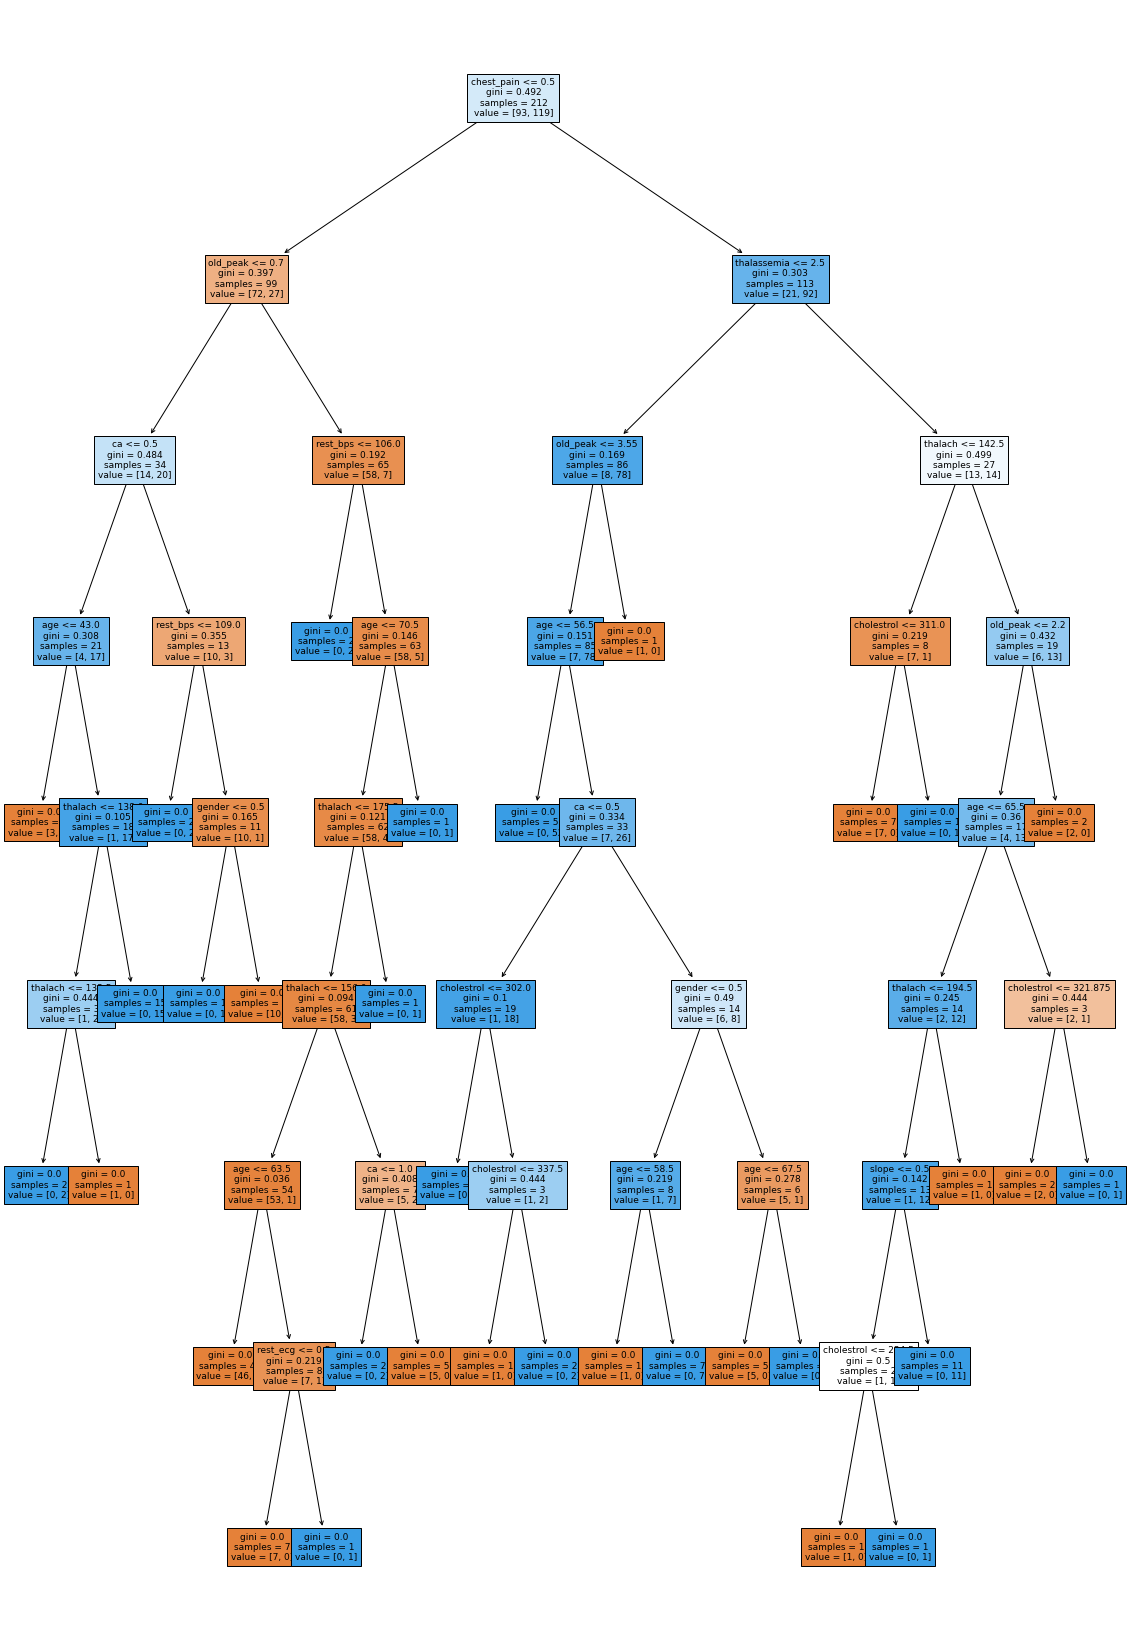

In [ ]:
from sklearn import tree
feature_names=list(x.columns)
plt.figure(figsize=(20,30))
out =tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)

for o in out:
  arrow =o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

In [ ]:
#importance of features
print(pd.DataFrame(model.feature_importances_,columns=["Imp"],index=x_train.columns).sort_values(by = "Imp",ascending=False))

                  Imp
chest_pain   0.296327
old_peak     0.134737
age          0.125586
ca           0.100709
thalach      0.092486
thalassemia  0.059399
rest_bps     0.058265
cholestrol   0.057258
gender       0.050368
rest_ecg     0.016762
slope        0.008104


In [ ]:
model.predict([[63,0,2,150,233,0,171,1.5,0,0,0]])

array([1])

**MODEL BUILDING WITH RANDOM FOREST ALGORITHM:**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from pandas.core.common import random_state
rf=RandomForestClassifier(random_state=7)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=7)

In [ ]:
pred_train1=rf.predict(x_train)

In [ ]:
pred_test1=rf.predict(x_test)

In [ ]:
confusion_matrix(y_train,pred_train1)

array([[ 93,   0],
       [  0, 119]])

In [ ]:
confusion_matrix(y_test,pred_test1)

array([[28, 17],
       [ 7, 39]])

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train1))
print("Recall on test data:",recall_score(y_test,pred_test1))
print("\n")

Recall on train data: 1.0
Recall on test data: 0.8478260869565217




In [ ]:
print("precision on train data:",precision_score(y_train,pred_train1))
print("precision on test data:",precision_score(y_test,pred_test1))
print("\n")

precision on train data: 1.0
precision on test data: 0.6964285714285714




In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_estimator=RandomForestClassifier(random_state=1)
parameters={
          'n_estimators':[10],
           'min_samples_leaf':np.arange(1,6,1),
           'max_features':['auto'],
           'max_samples':[0.9,None],
          }
 

grid_obj =RandomizedSearchCV(rf_estimator,parameters,n_jobs=-1,n_iter=10,scoring='recall',cv=10)
grid_obj=grid_obj.fit(x_train,y_train)
rf_estimator=grid_obj.best_estimator_
rf_estimator.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.9, min_samples_leaf=5, n_estimators=10,
                       random_state=1)

In [ ]:
pred_train3=rf_estimator.predict(x_train)

In [ ]:
pred_test3=rf_estimator.predict(x_test)

In [ ]:
confusion_matrix(y_train,pred_train3)

array([[ 81,  12],
       [  8, 111]])

In [ ]:

confusion_matrix(y_test,pred_test3)

array([[32, 13],
       [ 5, 41]])

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train3))
print("Recall on test data:",recall_score(y_test,pred_test3))
print("\n")

Recall on train data: 0.9327731092436975
Recall on test data: 0.8913043478260869




In [ ]:
print("precision on train data:",precision_score(y_train,pred_train3))
print("precision on test data:",precision_score(y_test,pred_test3))
print("\n")

precision on train data: 0.9274193548387096
precision on test data: 0.7407407407407407




**MODEL BUILDING WITH XGBOOST ALGORITHM:**

In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [ ]:
xgb_classifier=XGBClassifier(random_state=1,eval_metric="logloss")
xgb_classifier.fit(x_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

In [ ]:
pred_train=xgb_classifier.predict(x_train)
pred_test=xgb_classifier.predict(x_test)

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train))
print("Recall on test data:",recall_score(y_test,pred_test))
print("\n")

Recall on train data: 1.0
Recall on test data: 0.8913043478260869




In [ ]:
print("precision on train data:",precision_score(y_train,pred_train))
print("precision on test data:",precision_score(y_test,pred_test))
print("\n")

precision on train data: 0.9916666666666667
precision on test data: 0.6949152542372882




In [ ]:
xgb_tuned = XGBClassifier(random_state=1,eval_metric="logloss")

parameter ={
    "n_estimators":np.arange(150,250,50),
    "scale_pos_weight":[1,2],
    "subsample":[0.7,0.9,1],
    "learning_rate":np.arange(0.1,0.4,0.1),
    "gamma":[1,3,5],
    "colsample_bytree":[0.7,0.8,0.9],
    "colsample_bylevel":[0.8,0.9,1]

}

asc_scorer =metrics.make_scorer(metrics.f1_score)

grid_obj = RandomizedSearchCV(xgb_tuned,parameter,scoring=asc_scorer,cv=5,n_iter=10)
grid_obj=grid_obj.fit(x_train,y_train)

xgb_tuned =grid_obj.best_estimator_


xgb_tuned.fit(x_train,y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.7,
              eval_metric='logloss', gamma=1, n_estimators=200, random_state=1,
              scale_pos_weight=2, subsample=0.9)

In [ ]:
pred_train3=xgb_tuned.predict(x_train)
pred_test3=xgb_tuned.predict(x_test)

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train3))
print("Recall on test data:",recall_score(y_test,pred_test3))
print("\n")

Recall on train data: 1.0
Recall on test data: 0.8695652173913043




In [ ]:
print("precision on train data:",precision_score(y_train,pred_train3))
print("precision on test data:",precision_score(y_test,pred_test3))
print("\n")

precision on train data: 0.9596774193548387
precision on test data: 0.6896551724137931




**MODEL BUILDING WITH LOGISTIC REGRESSION ALGORITHM USING SKLEARN METHOD:**

In [ ]:
#import required libraries and split the data into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 7)

In [ ]:
#import confusion matrix code 
#confusion matrix creates crosstab of TN,TP,FP,FN
from sklearn.metrics import confusion_matrix

In [ ]:
#choose the model and analyze
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
#fitting the model from x,y train set
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#predict the test set
pred_test = logreg.predict(x_test)

In [ ]:
#predict the train set
pred_train = logreg.predict(x_train)

In [ ]:
#calling the confusion matrix for train data 
confusion_matrix(y_train,pred_train)

array([[ 77,  16],
       [  8, 111]])

In [ ]:
#for test data call confusion matrix
confusion_matrix(y_test,pred_test)

array([[32, 13],
       [ 4, 42]])

In [ ]:
#import required finding values
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [ ]:
#getting the values of f1,accuracy,recall,precision scores at default 0.5 probability 
print("Accuracy on train data:",accuracy_score(y_train,pred_train))
print("Accuracy on test data:",accuracy_score(y_test,pred_test))
print("\n")
print("Recall on train data:",recall_score(y_train,pred_train))
print("Recall on test data:",recall_score(y_test,pred_test))
print("\n")
print("Precision on train data:",precision_score(y_train,pred_train))
print("Precision on test data:",precision_score(y_test,pred_test))
print("\n")
print("f1 on train data:",f1_score(y_train,pred_train))
print("f1 on test data:",f1_score(y_test,pred_test))
print("\n")

Accuracy on train data: 0.8867924528301887
Accuracy on test data: 0.8131868131868132


Recall on train data: 0.9327731092436975
Recall on test data: 0.9130434782608695


Precision on train data: 0.8740157480314961
Precision on test data: 0.7636363636363637


f1 on train data: 0.9024390243902439
f1 on test data: 0.8316831683168316




In [ ]:
x_train.head(5)

,age,gender,chest_pain,rest_bps,cholestrol,rest_ecg,thalach,old_peak,slope,ca,thalassemia
40,51.0,0.0,2.0,140.0,308.0,0.0,142.0,1.5,2.0,1.0,2.0
147,60.0,0.0,3.0,150.0,240.0,1.0,171.0,0.9,2.0,0.0,2.0
11,48.0,0.0,2.0,130.0,275.0,1.0,139.0,0.2,2.0,0.0,2.0
234,70.0,1.0,0.0,130.0,322.0,0.0,109.0,2.4,1.0,2.5,2.0
240,70.0,1.0,2.0,160.0,269.0,1.0,112.0,2.9,1.0,1.0,3.0


In [ ]:
x_test.head()

,age,gender,chest_pain,rest_bps,cholestrol,rest_ecg,thalach,old_peak,slope,ca,thalassemia
125,34.0,0.0,1.0,118.0,210.0,1.0,192.0,0.7,2.0,0.0,2.0
57,45.0,1.0,0.0,115.0,260.0,0.0,185.0,0.0,2.0,0.0,2.0
282,59.0,1.0,2.0,126.0,218.0,1.0,134.0,2.2,1.0,1.0,1.0
66,51.0,1.0,2.0,100.0,222.0,1.0,143.0,1.2,1.0,0.0,2.0
114,55.0,1.0,1.0,130.0,262.0,1.0,155.0,0.0,2.0,0.0,2.0


In [ ]:
logreg.predict([[35,0,1,120,241,1,160,1.0,1,2.0,2]])

array([1])

In [ ]:
#importing roc curve from metrics
from sklearn.metrics import roc_auc_score,roc_curve

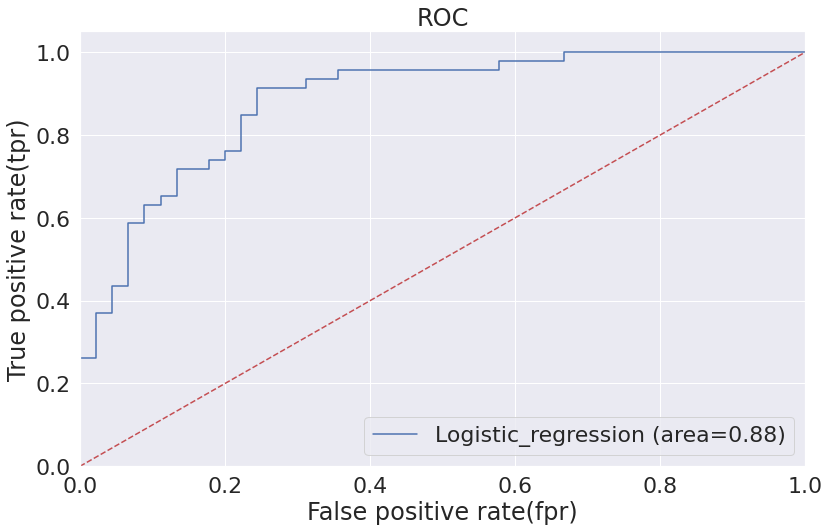

In [ ]:
#plotting the roc curve and getting the value of auc 
logit_roc_auc=roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1])
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr,tpr,label="Logistic_regression (area=%0.2f)"% logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive rate(fpr)")
plt.ylabel("True positive rate(tpr)")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

In [ ]:
#probaility of train set for predicted value
train_pred_prob = logreg.predict_proba(x_train)[:,1]
train_pred_prob

array([7.83643812e-01, 9.94006245e-01, 9.73380095e-01, 7.08309283e-03,
       4.17394853e-02, 1.92489056e-02, 7.31033656e-01, 6.48951480e-01,
       6.63904013e-01, 7.48663263e-01, 9.63716218e-01, 1.47303520e-01,
       9.91785278e-01, 9.82235339e-01, 8.40112962e-02, 3.04092836e-02,
       8.28604803e-01, 1.29707197e-01, 9.55196515e-01, 8.20455889e-01,
       4.68610068e-01, 9.39523862e-01, 4.17808792e-02, 7.48663263e-01,
       3.28071807e-01, 6.23611856e-01, 3.73012243e-02, 9.64473442e-02,
       3.24912819e-01, 7.67560951e-01, 9.25780433e-01, 8.93479134e-01,
       9.90595185e-01, 1.03543450e-01, 9.40398168e-02, 9.87012709e-01,
       9.74320516e-01, 5.48586102e-01, 9.31489183e-01, 6.89564023e-01,
       4.55276343e-01, 5.76545264e-01, 6.55488510e-02, 9.14030993e-01,
       9.23053987e-01, 2.86969419e-01, 1.24765154e-01, 7.26677526e-01,
       6.55503376e-01, 6.11148081e-01, 9.60457073e-01, 8.01947462e-01,
       4.18468541e-02, 1.72875481e-02, 9.30485126e-01, 6.20806106e-01,
      

In [ ]:
#getting the value of cutoff,TN,TP,FN,FP,P,N
#TP=True positive
#TN=True negative
#FP=False positive
#FN=False negative
columns_names =["Cutoff_prob","TP","FN","TN","FP","P","N"]

cutoff_data= pd.DataFrame(columns=columns_names)
Cutoff_prob=np.arange(0,1.01,0.01)

for cutoff in Cutoff_prob:
  y_train["pred_y"]=(train_pred_prob > cutoff).astype("int64")
  TP =np.logical_and((y_train.pred_y ==1),(y_train.target ==1)).sum()
  FN =np.logical_and((y_train.pred_y ==0),(y_train.target ==1)).sum()
  TN =np.logical_and((y_train.pred_y ==0),(y_train.target ==0)).sum()
  FP =np.logical_and((y_train.pred_y ==1),(y_train.target ==0)).sum()
  P =TP + FN
  N =TN + FP
  temp_data={"Cutoff_Prob":cutoff,
             "TP":TP,
             "FN":FN,
             "TN":TN,
             "FP":FP,
             "P":P,
             "N":N}

  cutoff_data =cutoff_data.append(temp_data,ignore_index=True)   

  y_train.drop("pred_y",axis =1 ,inplace=True)

In [ ]:
#values of sn,sp,ks,dist cutoffs,re,pr,f1,tpr,fpr
cutoff_data['Sn'] =cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] =cutoff_data["TN"]/cutoff_data["N"]
cutoff_data["Dist"]=((1-cutoff_data["Sn"])*2 + (1-cutoff_data["Sp"])*2) **0.5
cutoff_data["KS"]=((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] =cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] =cutoff_data["TP"]/(cutoff_data["TP"]+cutoff_data["FP"])
cutoff_data['tpr'] =cutoff_data["Re"]
cutoff_data['fpr'] =1 - cutoff_data["Sp"]
cutoff_data["f1"]=2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] +cutoff_data["Re"])

In [ ]:
#threshold cutoffs for f1,KS,distance cutoffs
dist_cutoffs = cutoff_data["Dist"].min()
ks_cutoffs = cutoff_data["KS"].max()
f1_cutoffs = cutoff_data["f1"].max()

In [ ]:
cutoff_data.head()

,Cutoff_prob,TP,FN,TN,FP,P,N,Cutoff_Prob,Sn,Sp,Dist,KS,Re,Pr,tpr,fpr,f1
0,NaN,119.0,0.0,0.0,93.0,119.0,93.0,0.00,1.0,0.000000,1.414214,0.000000,1.0,0.561321,1.0,1.000000,0.719033
1,NaN,119.0,0.0,14.0,79.0,119.0,93.0,0.01,1.0,0.150538,1.303428,0.150538,1.0,0.601010,1.0,0.849462,0.750789
2,NaN,119.0,0.0,22.0,71.0,119.0,93.0,0.02,1.0,0.236559,1.235671,0.236559,1.0,0.626316,1.0,0.763441,0.770227
3,NaN,119.0,0.0,27.0,66.0,119.0,93.0,0.03,1.0,0.290323,1.191367,0.290323,1.0,0.643243,1.0,0.709677,0.782895
4,NaN,119.0,0.0,34.0,59.0,119.0,93.0,0.04,1.0,0.365591,1.126418,0.365591,1.0,0.668539,1.0,0.634409,0.801347


In [ ]:
#getting the value of f1,precision,recall,accuracy score of diffrent cutoff values
cutoffs = [dist_cutoffs,ks_cutoffs,f1_cutoffs]
for cutoff in cutoffs:
  y_pred_train = (logreg.predict_proba(x_train)[:,1]> cutoff).astype(int)
  y_pred_test = (logreg.predict_proba(x_test)[:,1]> cutoff).astype(int)
  print("using the cutoff value as : ",cutoff)
  print("Accuracy on train data :", accuracy_score(y_train,y_pred_train))
  print("Accuracy on test data :",accuracy_score(y_test,y_pred_test))
  print("Recall on train data:", recall_score(y_train, y_pred_train))
  print("Recall on test data:", recall_score(y_test, y_pred_test))
  print("Precision on train data:", precision_score(y_train, y_pred_train))
  print("Precision on test data:", precision_score(y_test, y_pred_test))
  print("f1 score on train data :",f1_score(y_train,y_pred_train))
  print("f1 score on test data :",f1_score(y_test,y_pred_test))
  print("\n")

using the cutoff value as :  0.6286724579347196
Accuracy on train data : 0.9009433962264151
Accuracy on test data : 0.8021978021978022
Recall on train data: 0.8991596638655462
Recall on test data: 0.8260869565217391
Precision on train data: 0.9224137931034483
Precision on test data: 0.7916666666666666
f1 score on train data : 0.9106382978723405
f1 score on test data : 0.8085106382978724


using the cutoff value as :  0.8023854703171591
Accuracy on train data : 0.7877358490566038
Accuracy on test data : 0.7692307692307693
Recall on train data: 0.6638655462184874
Recall on test data: 0.6739130434782609
Precision on train data: 0.9404761904761905
Precision on test data: 0.8378378378378378
f1 score on train data : 0.7783251231527093
f1 score on test data : 0.746987951807229


using the cutoff value as :  0.9113924050632911
Accuracy on train data : 0.6698113207547169
Accuracy on test data : 0.6813186813186813
Recall on train data: 0.42857142857142855
Recall on test data: 0.43478260869565216

**MODEL BUILDING WITH LOGISTIC REGRESSION ALGORITHM USING STATS METHOD:**

In [ ]:
#import the required models
import statsmodels.api as sm
from statsmodels.api import add_constant

In [ ]:
#adding constant to the data
x = sm.add_constant(x, prepend=True)

In [ ]:
#spliting the data into train n test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)
olsmod0=sm.OLS(y_train,x_train)
olsres0=olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     23.20
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           3.16e-30
Time:                        07:08:58   Log-Likelihood:                -65.082
No. Observations:                 212   AIC:                             154.2
Df Residuals:                     200   BIC:                             194.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8258      0.337      2.450      

In [ ]:
#vif calculations
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x_train.values,i)
for i in range(x_train.shape[1])], index=x_train.columns)
print('Series before feature selection: \n\n{}n'.format(vif_series1))
vif_series1.sort_values(ascending=False)


Series before feature selection: 

const          210.080022
age              1.527580
gender           1.206406
chest_pain       1.190832
rest_bps         1.133475
cholestrol       1.192877
rest_ecg         1.056171
thalach          1.501906
old_peak         1.947162
slope            1.787363
ca               1.223217
thalassemia      1.132525
dtype: float64n


const          210.080022
old_peak         1.947162
slope            1.787363
age              1.527580
thalach          1.501906
ca               1.223217
gender           1.206406
cholestrol       1.192877
chest_pain       1.190832
rest_bps         1.133475
thalassemia      1.132525
rest_ecg         1.056171
dtype: float64

In [ ]:
#creating ols model
olsmod0=sm.OLS(y_train,x_train)
olsres0=olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     23.20
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           3.16e-30
Time:                        07:09:15   Log-Likelihood:                -65.082
No. Observations:                 212   AIC:                             154.2
Df Residuals:                     200   BIC:                             194.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8258      0.337      2.450      

In [ ]:
#ropping the column whose p value is greater than 0.05
cols = x_train.columns.tolist()
max_p_value = 1
while len(cols) > 0:
    # Defining the train set
    x_train_aux = x_train[cols]
    # fitting model
    model = sm.OLS(y_train, x_train_aux).fit()
    # Getting the p-value and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    # name the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break
           
selected_features = cols
print(selected_features)

['const', 'gender', 'chest_pain', 'thalach', 'old_peak', 'ca', 'thalassemia']


In [ ]:
#copy the columns whose values is less than 0.05 into train1
x_train1=x_train[['const', 'gender', 'chest_pain', 'thalach', 'old_peak', 'ca', 'thalassemia']]

In [ ]:
#copy the columns whose values is less than 0.05 into test1
x_test1=x_test[['const', 'gender', 'chest_pain', 'thalach', 'old_peak', 'ca', 'thalassemia']]

In [ ]:
#getting the summary of whole data
olsmod0=sm.OLS(y_train,x_train1)
olsres0=olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     41.75
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           4.81e-33
Time:                        07:09:22   Log-Likelihood:                -67.637
No. Observations:                 212   AIC:                             149.3
Df Residuals:                     205   BIC:                             172.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6519      0.205      3.175      

In [ ]:
#fitting the model from x,y train set
logreg.fit(x_train1, y_train)

LogisticRegression()

In [ ]:
#predict the train set
pred_train = logreg.predict(x_train1)

In [ ]:
#calling the confusion matrix for train data 
confusion_matrix(y_train,pred_train)

array([[ 78,  15],
       [ 11, 108]])

In [ ]:
#fitting the model from x,y train set
logreg.fit(x_test1, y_test)

LogisticRegression()

In [ ]:
#predict the train set
pred_test = logreg.predict(x_test1)

In [ ]:
confusion_matrix(y_test,pred_test)

array([[33, 12],
       [ 8, 38]])

In [ ]:
#import required finding values
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [ ]:
print("Accuracy on train data:",accuracy_score(y_train,pred_train))
print("Accuracy on test data:",accuracy_score(y_test,pred_test))
print("\n")
print("Recall on train data:",recall_score(y_train,pred_train))
print("Recall on test data:",recall_score(y_test,pred_test))
print("\n")
print("Precision on train data:",precision_score(y_train,pred_train))
print("Precision on test data:",precision_score(y_test,pred_test))
print("\n")
print("f1 on train data:",f1_score(y_train,pred_train))
print("f1 on test data:",f1_score(y_test,pred_test))
print("\n")

Accuracy on train data: 0.8773584905660378
Accuracy on test data: 0.7802197802197802


Recall on train data: 0.907563025210084
Recall on test data: 0.8260869565217391


Precision on train data: 0.8780487804878049
Precision on test data: 0.76


f1 on train data: 0.8925619834710744
f1 on test data: 0.7916666666666667




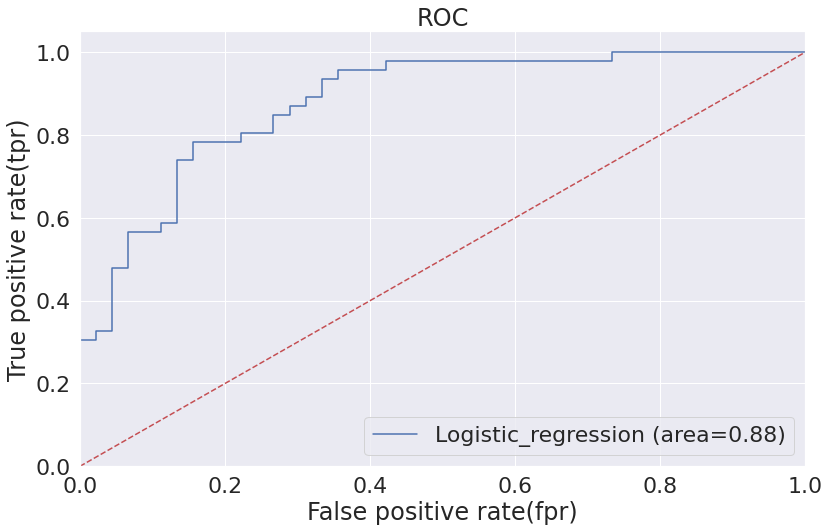

In [ ]:
#plotting the roc curve and getting the value of auc 
logit_roc_auc=roc_auc_score(y_test,logreg.predict_proba(x_test1)[:,1])
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(x_test1)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr,tpr,label="Logistic_regression (area=%0.2f)"% logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive rate(fpr)")
plt.ylabel("True positive rate(tpr)")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

In [ ]:
#probaility of train set for predicted value
train_pred_prob = logreg.predict_proba(x_train1)[:,1]
train_pred_prob

array([0.53229545, 0.95203105, 0.82811747, 0.00939809, 0.06265949,
       0.02451026, 0.52166674, 0.74586004, 0.51772802, 0.45051527,
       0.92855926, 0.163523  , 0.94426747, 0.93986856, 0.06160706,
       0.02148472, 0.35126016, 0.11834906, 0.84433434, 0.79189237,
       0.27093338, 0.8400582 , 0.14233718, 0.45051527, 0.12999284,
       0.39536017, 0.05337498, 0.06333001, 0.54681798, 0.77070691,
       0.73031792, 0.53819847, 0.94811506, 0.07957463, 0.16220187,
       0.94500218, 0.8955712 , 0.75636336, 0.75949817, 0.64872579,
       0.35701558, 0.7908516 , 0.13517983, 0.71885639, 0.83923724,
       0.30166886, 0.18046249, 0.35261351, 0.69264628, 0.65253134,
       0.84981446, 0.6593054 , 0.05171472, 0.12085352, 0.84167594,
       0.49955755, 0.91382348, 0.81061615, 0.0305628 , 0.73850431,
       0.57868753, 0.66868583, 0.81035787, 0.76287194, 0.21057233,
       0.77637619, 0.87794992, 0.02381074, 0.80252794, 0.67238516,
       0.05740954, 0.83596424, 0.57085124, 0.85566042, 0.01891

In [ ]:
#getting the value of cutoff,TN,TP,FN,FP,P,N
columns_names =["Cutoff_prob","TP","FN","TN","FP","P","N"]

cutoff_data= pd.DataFrame(columns=columns_names)
Cutoff_prob=np.arange(0,1.01,0.01)

for cutoff in Cutoff_prob:
  y_train["pred_y"]=(train_pred_prob > cutoff).astype("int64")
  TP =np.logical_and((y_train.pred_y ==1),(y_train.target ==1)).sum()
  FN =np.logical_and((y_train.pred_y ==0),(y_train.target ==1)).sum()
  TN =np.logical_and((y_train.pred_y ==0),(y_train.target ==0)).sum()
  FP =np.logical_and((y_train.pred_y ==1),(y_train.target ==0)).sum()
  P =TP + FN
  N =TN + FP
  temp_data={"Cutoff_Prob":cutoff,
             "TP":TP,
             "FN":FN,
             "TN":TN,
             "FP":FP,
             "P":P,
             "N":N}

  cutoff_data =cutoff_data.append(temp_data,ignore_index=True)   

  y_train.drop("pred_y",axis =1 ,inplace=True)

In [ ]:
#values of sn,sp,ks,dist cutoffs,re,pr,f1,tpr,fpr
cutoff_data['Sn'] =cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] =cutoff_data["TN"]/cutoff_data["N"]
cutoff_data["Dist"]=((1-cutoff_data["Sn"])*2 + (1-cutoff_data["Sp"])*2) **0.5
cutoff_data["KS"]=((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] =cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] =cutoff_data["TP"]/(cutoff_data["TP"]+cutoff_data["FP"])
cutoff_data['tpr'] =cutoff_data["Re"]
cutoff_data['fpr'] =1 - cutoff_data["Sp"]
cutoff_data["f1"]=2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] +cutoff_data["Re"])

In [ ]:
dist_cutoffs = cutoff_data["Dist"].min()
ks_cutoffs = cutoff_data["KS"].max()
f1_cutoffs = cutoff_data["f1"].max()

In [ ]:
cutoff_data.head()

,Cutoff_prob,TP,FN,TN,FP,P,N,Cutoff_Prob,Sn,Sp,Dist,KS,Re,Pr,tpr,fpr,f1
0,NaN,119.0,0.0,0.0,93.0,119.0,93.0,0.00,1.0,0.000000,1.414214,0.000000,1.0,0.561321,1.0,1.000000,0.719033
1,NaN,119.0,0.0,3.0,90.0,119.0,93.0,0.01,1.0,0.032258,1.391217,0.032258,1.0,0.569378,1.0,0.967742,0.725610
2,NaN,119.0,0.0,11.0,82.0,119.0,93.0,0.02,1.0,0.118280,1.327946,0.118280,1.0,0.592040,1.0,0.881720,0.743750
3,NaN,119.0,0.0,16.0,77.0,119.0,93.0,0.03,1.0,0.172043,1.286823,0.172043,1.0,0.607143,1.0,0.827957,0.755556
4,NaN,119.0,0.0,18.0,75.0,119.0,93.0,0.04,1.0,0.193548,1.270001,0.193548,1.0,0.613402,1.0,0.806452,0.760383


In [ ]:
x_train.head()

,const,age,gender,chest_pain,rest_bps,cholestrol,rest_ecg,thalach,old_peak,slope,ca,thalassemia
40,1.0,51.0,0.0,2.0,140.0,308.0,0.0,142.0,1.5,2.0,1.0,2.0
147,1.0,60.0,0.0,3.0,150.0,240.0,1.0,171.0,0.9,2.0,0.0,2.0
11,1.0,48.0,0.0,2.0,130.0,275.0,1.0,139.0,0.2,2.0,0.0,2.0
234,1.0,70.0,1.0,0.0,130.0,322.0,0.0,109.0,2.4,1.0,2.5,2.0
240,1.0,70.0,1.0,2.0,160.0,269.0,1.0,112.0,2.9,1.0,1.0,3.0


In [ ]:
cutoffs = [dist_cutoffs,ks_cutoffs,f1_cutoffs]
for cutoff in cutoffs:
  y_pred_train = (logreg.predict_proba(x_train1)[:,1]> cutoff).astype(int)
  y_pred_test = (logreg.predict_proba(x_test1)[:,1]> cutoff).astype(int)
  print("using the cutoff value as : ",cutoff)
  print("Accuracy on train data :", accuracy_score(y_train,y_pred_train))
  print("Accuracy on test data :",accuracy_score(y_test,y_pred_test))
  print("Recall on train data:", recall_score(y_train, y_pred_train))
  print("Recall on test data:", recall_score(y_test, y_pred_test))
  print("Precision on train data:", precision_score(y_train, y_pred_train))
  print("Precision on test data:", precision_score(y_test, y_pred_test))
  print("f1 score on train data :",f1_score(y_train,y_pred_train))
  print("f1 score on test data :",f1_score(y_test,y_pred_test))
  print("\n")

using the cutoff value as :  0.7918898569217928
Accuracy on train data : 0.6839622641509434
Accuracy on test data : 0.7252747252747253
Recall on train data: 0.453781512605042
Recall on test data: 0.5217391304347826
Precision on train data: 0.9642857142857143
Precision on test data: 0.8888888888888888
f1 score on train data : 0.6171428571428571
f1 score on test data : 0.6575342465753423


using the cutoff value as :  0.6864552272521912
Accuracy on train data : 0.7830188679245284
Accuracy on test data : 0.7252747252747253
Recall on train data: 0.6638655462184874
Recall on test data: 0.5869565217391305
Precision on train data: 0.9294117647058824
Precision on test data: 0.8181818181818182
f1 score on train data : 0.7745098039215687
f1 score on test data : 0.6835443037974683


using the cutoff value as :  0.8715953307392997
Accuracy on train data : 0.5613207547169812
Accuracy on test data : 0.6263736263736264
Recall on train data: 0.2184873949579832
Recall on test data: 0.2608695652173913
P

**Conclusions:**


*   Chest pain and old peak are the main variabe is causing heart disease.
*   Exer angima and fasting blood sugar are the variable which are not causing heart disease.


*   Remaining columns/variables affecting rate is average.

Results of well fitted model is obtained from logistic regression on default 0.5 probability is like:
 
*    Recall on train data: 0.9327731092436975

*    Recall on test data: 0.9130434782608695

As there is not much difference between train and test results , model is said to be well fitted and can be considered for predicting heart disease.

In [ ]:
from sklearn import metrics

In [ ]:
cols = ['Model', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']
result_tabulation = pd.DataFrame(columns = cols)


Logistic_metrics = pd.Series({'Model': "Logistic",
                
                 'Precision Score for test': metrics.precision_score(y_test, pred_test),
                 'Recall Score': metrics.recall_score(y_test, pred_test),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test),
                'f1-score':metrics.f1_score(y_test, pred_test)})

result_tabulation = result_tabulation.append(Logistic_metrics , ignore_index = True)
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score,Precision Score for test
0,Logistic,NaN,0.913043,0.813187,0.831683,0.763636
